# 과제1 Autoencoder와 Variational Autoencoder

**템플릿**

Epoch 1/200
32/32 [==============================] - 1s 9ms/step - loss: 0.1751
Epoch 2/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0805
Epoch 3/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0678
Epoch 4/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0653
Epoch 5/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0612
Epoch 6/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0584
Epoch 7/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0566
Epoch 8/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0555
Epoch 9/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0545
Epoch 10/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0537
Epoch 11/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0533
Epoch 12/200
32/32 [==============================] - 0s 11ms/step - loss: 0.0527
Epoch 13/200
32/32 [======

32/32 [==============================] - 0s 10ms/step - loss: 0.0386
Epoch 102/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0390
Epoch 103/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0386
Epoch 104/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0388
Epoch 105/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0388
Epoch 106/200
32/32 [==============================] - 0s 11ms/step - loss: 0.0394
Epoch 107/200
32/32 [==============================] - 0s 11ms/step - loss: 0.0387
Epoch 108/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0384
Epoch 109/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0381
Epoch 110/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0382
Epoch 111/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0380
Epoch 112/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0382
Epoch 113/200
32/3

Epoch 200/200
32/32 [==============================] - 0s 11ms/step - loss: 0.0350


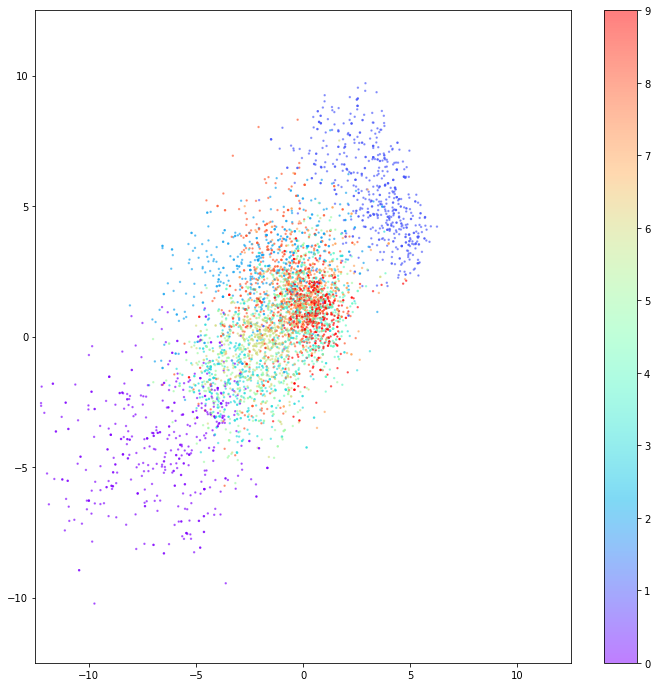

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten
from tensorflow.keras.layers import Dense, Conv2DTranspose
from tensorflow.keras.layers import Reshape, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

import os

# 재현 가능한 난수 생성
np.random.seed(0)
tf.random.set_seed(0)

z_dim = 2

# 여기에 SamplingLayer를 추가합니다.

# `tf.keras.backend.random_normal` 함수는 무엇을 하는 것인지 직접 찾아보고 적어주세요.
ans01 = """
여기에 기입하세요.
"""

# `tf.keras.backend.random_normal` 함수를 호출할 때 `shape=(batch, dim)`으로 설정하였습니다.  
#  이렇게 `shape`을 지정한 이유에 대해 적어주세요.
ans02 = """
여기에 기입하세요.
"""

encoder_input = keras.Input(shape=(28, 28, 1), name='encoder_input')
x = Conv2D(32, 3, strides=1, padding="same", name='encoder_conv_0')(encoder_input)
x = LeakyReLU()(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_1')(x)
x = LeakyReLU()(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_2')(x)
x = LeakyReLU()(x)
x = Conv2D(64, 3, strides=1, padding="same", name='encoder_conv_3')(x)
x = LeakyReLU()(x)
shape_before_flattening = K.int_shape(x)[1:]
x = Flatten()(x)
# VAE를 위하여 mu와 log_var를 출력하고 Sampling Layer를 통하여 z를 출력하도록 변경합니다.
encoder_output= Dense(z_dim, name='encoder_output')(x)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.Input(shape=(z_dim,), name='decoder_input')
x = Dense(np.prod(shape_before_flattening))(decoder_input)
x = Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(64, 3, strides=1, padding="same", name='decoder_conv_t0')(x)
x = LeakyReLU()(x)
x = layers.Conv2DTranspose(64, 3, strides=2, padding="same", name='decoder_conv_t1')(x)
x = LeakyReLU()(x)
x = layers.Conv2DTranspose(32, 3, strides=2, padding="same", name='decoder_conv_t2')(x)
x = LeakyReLU()(x)
x = layers.Conv2DTranspose(1, 3, strides=1, padding="same", name='decoder_conv_t3')(x)
decoder_output = Activation('sigmoid')(x)
decoder = keras.Model(decoder_input, decoder_output, name="decoder")

class AutoEncoder(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(AutoEncoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
    def call(self,inputs):
        latent = self.encoder(inputs)
        return self.decoder(latent)

@tf.function
def r_loss(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred), axis = [1,2,3])

# 여기에 VAEModel 코드를 추가합니다.

LEARNING_RATE = 0.0005
BATCH_SIZE = 32
EPOCHS = 200

# AutoEncoder에서 VAEModel로 model을 변경합니다.
model = AutoEncoder(encoder, decoder)

# compile시에 loss 부분은 삭제합니다. VAE의 경우 model의 train_step()에서 loss가 정의됩니다.
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss=r_loss)

# mnist 데이터 읽어오기
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

x_train = x_train/255.
x_test = x_test/255.

model.fit(x_train[:1000], x_train[:1000], epochs=EPOCHS, batch_size=BATCH_SIZE)

n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

# VAE의 encoder의 경우 mu, log_var, z_points의 3개가 출력되므로, 아래의 코드를 수정합니다.
z_points = model.encoder.predict(example_images)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()
plt.xlim(-12.5, 12.5)
plt.ylim(-12.5, 12.5)
plt.show()

ans03 = z_points.copy()

# Autoencoder와 비교해서 latent vector의 분포가 어떻게 달라졌는지를 ans04에 기입합니다.
ans04 = """
여기에 기입하세요.
"""

# 분포가 VAE처럼 변화될 경우 Autoencoder보다 어떤 장점이 있는 지를 ans05에 기입합니다.
ans05 = """
여기에 기입하세요.
"""


**과제 내용**  

1. Autoencoder  
    템플릿의 코드는 MNIST 필기체 이미지의 autoencoder로서 실습파일인 `11_gan.ipynb`에 포함된 것과 거의 동일합니다.
    입력 이미지 input_image가 입력될 때, 인코더는 2차원의 latent vector $z$를 출력합니다.  
    `z = model.encoder(input_image)`  
    이 latent vector $z$를 decoder에 입력하면, 생성이미지 reconst_image가 출력됩니다.  
    `reconst_image = model.decoder(z)`  
    
    Loss는 추론값인 `reconst_image`와 참값이자 입력값인 `input_image`와의 Mean Squared Error로 정의하였습니다.  
    
    학습이 완료된 후, test set에서 `n_to_show = 5000`만큼의 이미지를 무작위로 추출하여, 
    encoder의 출력값인 `z`를 얻고, 그것을 2차원에 출력한 결과를 그래프로 표시하였습니다.  
    템플릿 코드를 실행하고 다시한번 코드와 그 결과를 리뷰합시다.  

2. Variational Autoencoder(VAE)로의 전환을 위한 Sampling 레이어의 정의 추가   
    VAE는 encoder의 마지막 부분에서 $z$ 대신에 $\mu$와 $\sigma$라는 두 개의 텐서를 출력합니다.  
    실제로는 $\sigma$ 대신에 분산의 로그값인 $\log\sigma^2$ (log of variance)로 대신합니다.  
    왜일까요?  
    $\sigma$는 표준편차로서 0보다 커야한다는 조건이 있는데, 신경망의 출력에서 제어하기 어렵기 때문입니다.  
    또한 KL divergence의 식에서 $\log\sigma^2$ 항이 있는데 이 항은 $\sigma$가 0에서 $-\infty$가 되어서 네트워크에 부동소수점 오류를 일으키기 쉽습니다.  
    따라서 $V\equiv\log\sigma^2$를 신경망의 출력값으로 정하고 그 대신에 $\sigma^2$은 $\exp(V)$로, $\sigma$는 $\exp(V/2)$로 계산하면 손실함수 계산에서 부동소수점 오류없이 계산이 가능하기 때문입니다.  
    이제 표준정규분포에서 임의의 수 $\epsilon$를 sampling하고, $\mu$와 $\log\sigma^2$를 이용하여 $z = \mu+\sigma\epsilon$를 만드는 Sampling Layer를 정의하겠습니다.  
    (실습파일 `12_deepfake.ipynb`에서 정의했던 것과 동일합니다.) 
```python
class Sampling(layers.Layer):
    """Uses (mu, log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        mu, log_var = inputs
        batch = tf.shape(mu)[0]
        dim = tf.shape(mu)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mu + tf.exp(log_var/2) * epsilon
```
    위의 sampling layer 코드를 읽고 이해해 봅시다.  
    `tf.keras.backend.random_normal` 함수는 무엇을 하는 것인지 직접 찾아보고 `ans01`에 기입합니다.
    `tf.keras.backend.random_normal` 함수를 호출할 때 `shape=(batch, dim)`으로 설정하였습니다.  
    이렇게 `shape`을 지정한 이유에 대해 `ans02`에 기입합니다.
    Sampling layer 코드를 과제 기입란에 추가합니다.
    
3. VAE 전환을 위하여 encoder 모델의 변경  

    템플릿의 Autoencoder의 encoder부분의 마지막 코드는 다음과 같습니다.
    Flatten 레이어 다음에 Latent space의 차원(z_dim)으로 축소하기위해 FC(Dense레이어)를 이용합니다.
```python
encoder_output= Dense(z_dim, name='encoder_output')(x)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')
```
    위의 코드를 다음과 같이 변경합니다.
```python
mu = Dense(z_dim, name='mu')(x)
log_var = Dense(z_dim, name='log_var')(x)
z = Sampling(name='encoder_output')([mu, log_var])
encoder_output = [mu, log_var, z]
encoder = keras.Model(encoder_input, encoder_output, name='encoder')
```
    VAE를 위하여 두개의 출력($\mu$, $\log\sigma^2$)을 각각 `Dense()`를 이용하여 만들고,  
    이것을 입력으로하는 Sampling 레이어를 통과하여 z를 출력합니다.  
    encoder의 출력은 Autoencoder의 경우는 $z$(`encoder_output`)뿐이었으나, VAE의 경우에는  
    $\mu$, $\log\sigma^2$, $z$의 3개 텐서를 출력합니다.  
    $z$는 decoder의 입력으로 사용이 되고 $\mu$와 $\log\sigma^2$는 손실함수의 계산에 사용됩니다.  
    이 코드는 모두 실습 시간에 다루었던 내용입니다.  
    
4. VAEModel의 정의  
    이제 전체 VAE 모델을 정의하고 코드에 추가합니다.
```python
class VAEModel(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean( # batch에 대해 평균
                tf.reduce_sum( # 이미지의 각 pixel에 대해 합산
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2)
                )
            )
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": tf.reduce_mean(total_loss),
            "reconstruction_loss": tf.reduce_mean(reconstruction_loss),
            "kl_loss": tf.reduce_mean(kl_loss),
        }

    def call(self,inputs):
        _,_,latent = self.encoder(inputs)
        return self.decoder(latent)
```
    가장 크게 달라진 점은 `train_step()`의 재정의 부분입니다.  
    `train_step()`은 모델이 학습될 때 한번의 batch마다 호출되는 기본 학습 함수입니다.  
    보통의 모델에서는 `keras.Model` 객체에 정의된 기본 모듈을 호출하는 것으로 충분하였습니다.  
    VAE에서는 이것을 customize해야 합니다.  
    이것은 손실함수가 보통의 경우 $\hat y$(추론결과)와 $y$(참값)만으로 계산되는 것에 비해서,  
    VAE에서는 KL divergence 손실 항 때문에, $\mu$와 $\log\sigma^2$라는 모델의 중간 출력(여기서는 encoder부분의 출력)을  
    사용해야 하기 때문입니다.  
    
    `with Gradient.tape()`으로 둘러쌓여진 코드는 손실함수를 계산하는 부분입니다.  
    손실함수를 계산하면서 그 미분(gradient)을 추적할 수 있도록 합니다.  
    `grads = tape.gradient(...)`는 gradient 값을 계산하는 부분입니다.  
    `self.optimizer.apply_gradients()`는 계산된 각 gradient 값을 해당 weights에 optimizer를 이용하여 변경하는 부분입니다.  
    이 부분이 실제 학습 parameter가 update되는 부분이라고 하겠습니다.  
    
    관심있으신 분들은 `train_step()`의 원래 소스도 한번 비교해 봐 주십시오.  
    https://github.com/keras-team/keras/blob/master/keras/engine/training.py  
    813줄부터 847줄까지가 해당 함수입니다.  
    거의 유사한 구조로 되어있음을 알 수 있습니다.  
    
    `model.compile()`부분에서 loss를 지정한 부분을 빼도록 합시다.  
    VAE모델에서는 손실함수를 `train_step()`에서 직접 처리하였으므로 손실함수의 지정이 필요없기 때문입니다.
```python
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE))
```

    모델 생성 부분을 `Autoencoder()`에서 새로 정의한 `VAEModel()`로 변경합니다.
```python
#model = AutoEncoder(encoder, decoder) #삭제 처리
model = VAEModel(encoder, decoder) # VAEModel로 변경
```
    `example_images`를 이용해서 latent 벡터를 호출하는 부분을 변경합니다.
```python
#z_points = model.encoder.predict(example_images) # Autoencoder용
_,_,z_points = model.encoder.predict(example_images) # VAE용
```
    생성된 `z_points`의 복사본을 `ans03`에 저장합니다. (이미 템플릿에 코드가 포함되어 있습니다.)  
    
    
4. VAE의 결과 분석

    이제 변경된 코드를 실행하고 결과를 분석합니다.  
    Autoencoder와 비교해서 latent vector의 분포가 어떻게 달라졌는지를 `ans04`에 기입합니다.  
    이렇게 분포가 VAE처럼 변화될 경우 Autoencoder보다 어떤 장점이 있는 지를 `ans05`에 기입합니다.
    

Epoch 1/200
32/32 [==============================] - 1s 11ms/step - loss: 417.7867 - reconstruction_loss: 409.5692 - kl_loss: 8.2175
Epoch 2/200
32/32 [==============================] - 0s 12ms/step - loss: 222.1409 - reconstruction_loss: 218.4266 - kl_loss: 3.7143
Epoch 3/200
32/32 [==============================] - 0s 12ms/step - loss: 202.6987 - reconstruction_loss: 199.1689 - kl_loss: 3.5298
Epoch 4/200
32/32 [==============================] - 0s 12ms/step - loss: 190.5692 - reconstruction_loss: 186.4729 - kl_loss: 4.0962
Epoch 5/200
32/32 [==============================] - 0s 12ms/step - loss: 185.6529 - reconstruction_loss: 181.5181 - kl_loss: 4.1347
Epoch 6/200
32/32 [==============================] - 0s 12ms/step - loss: 182.9691 - reconstruction_loss: 178.5679 - kl_loss: 4.4012
Epoch 7/200
32/32 [==============================] - 0s 12ms/step - loss: 182.1382 - reconstruction_loss: 177.8231 - kl_loss: 4.3151
Epoch 8/200
32/32 [==============================] - 0s 12ms/step - l

32/32 [==============================] - 0s 12ms/step - loss: 145.1997 - reconstruction_loss: 139.3832 - kl_loss: 5.8165
Epoch 124/200
32/32 [==============================] - 0s 12ms/step - loss: 144.6847 - reconstruction_loss: 138.7914 - kl_loss: 5.8932
Epoch 125/200
32/32 [==============================] - 0s 12ms/step - loss: 144.1593 - reconstruction_loss: 138.2263 - kl_loss: 5.9330
Epoch 126/200
32/32 [==============================] - 0s 12ms/step - loss: 144.7351 - reconstruction_loss: 138.8148 - kl_loss: 5.9203
Epoch 127/200
32/32 [==============================] - 0s 12ms/step - loss: 144.6872 - reconstruction_loss: 138.7010 - kl_loss: 5.9862
Epoch 128/200
32/32 [==============================] - 0s 12ms/step - loss: 144.4624 - reconstruction_loss: 138.4579 - kl_loss: 6.0044
Epoch 129/200
32/32 [==============================] - 0s 12ms/step - loss: 145.6835 - reconstruction_loss: 139.7176 - kl_loss: 5.9659
Epoch 130/200
32/32 [==============================] - 0s 12ms/step -

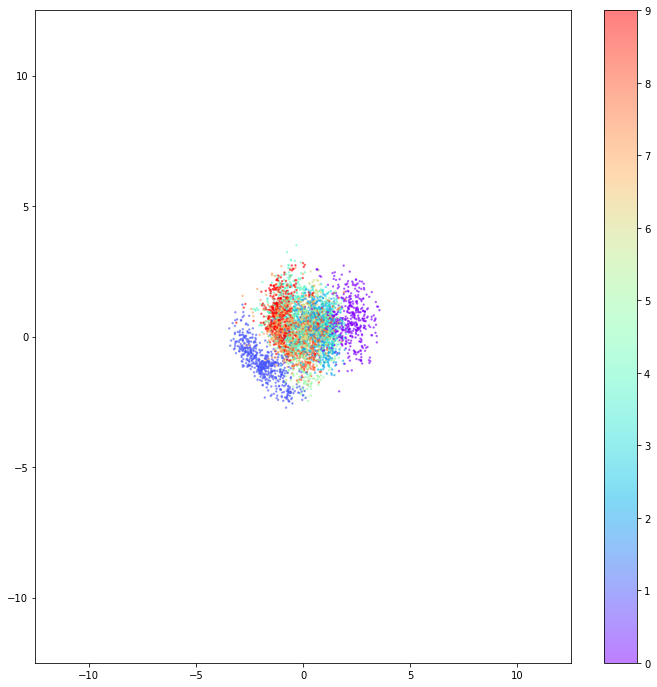

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten
from tensorflow.keras.layers import Dense, Conv2DTranspose
from tensorflow.keras.layers import Reshape, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

import os

# 재현 가능한 난수 생성
np.random.seed(0)
tf.random.set_seed(0)

z_dim = 2

class Sampling(layers.Layer):
    """Uses (mu, log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        mu, log_var = inputs
        batch = tf.shape(mu)[0]
        dim = tf.shape(mu)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mu + tf.exp(log_var/2) * epsilon

encoder_input = keras.Input(shape=(28, 28, 1), name='encoder_input')
x = Conv2D(32, 3, strides=1, padding="same", name='encoder_conv_0')(encoder_input)
x = LeakyReLU()(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_1')(x)
x = LeakyReLU()(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_2')(x)
x = LeakyReLU()(x)
x = Conv2D(64, 3, strides=1, padding="same", name='encoder_conv_3')(x)
x = LeakyReLU()(x)
shape_before_flattening = K.int_shape(x)[1:]
x = Flatten()(x)
mu = Dense(z_dim, name='mu')(x)
log_var = Dense(z_dim, name='log_var')(x)
z = Sampling(name='encoder_output')([mu, log_var])
encoder_output = [mu, log_var, z]
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.Input(shape=(z_dim,), name='decoder_input')
x = Dense(np.prod(shape_before_flattening))(decoder_input)
x = Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(64, 3, strides=1, padding="same", name='decoder_conv_t0')(x)
x = LeakyReLU()(x)
x = layers.Conv2DTranspose(64, 3, strides=2, padding="same", name='decoder_conv_t1')(x)
x = LeakyReLU()(x)
x = layers.Conv2DTranspose(32, 3, strides=2, padding="same", name='decoder_conv_t2')(x)
x = LeakyReLU()(x)
x = layers.Conv2DTranspose(1, 3, strides=1, padding="same", name='decoder_conv_t3')(x)
decoder_output = Activation('sigmoid')(x)
decoder = keras.Model(decoder_input, decoder_output, name="decoder")

class VAEModel(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean( # batch에 대해 평균
                tf.reduce_sum( # 이미지의 각 pixel에 대해 합산
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2)
                )
            )
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": tf.reduce_mean(total_loss),
            "reconstruction_loss": tf.reduce_mean(reconstruction_loss),
            "kl_loss": tf.reduce_mean(kl_loss),
        }

    def call(self,inputs):
        _,_,latent = self.encoder(inputs)
        return self.decoder(latent)

LEARNING_RATE = 0.0005
BATCH_SIZE = 32
EPOCHS = 200

model = VAEModel(encoder, decoder)

# compile시에 loss 부분은 삭제합니다. VAE의 경우 model의 train_step()에서 loss가 정의됩니다.
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE))

# mnist 데이터 읽어오기
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

x_train = x_train/255.
x_test = x_test/255.

#model.fit(x_train[:1000], x_train[:1000], epochs=EPOCHS, batch_size=BATCH_SIZE)
model.fit(x_train[:1000], epochs=EPOCHS, batch_size=BATCH_SIZE)

n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

_,_,z_points = model.encoder.predict(example_images)

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()
plt.xlim(-12.5, 12.5)
plt.ylim(-12.5, 12.5)
plt.show()

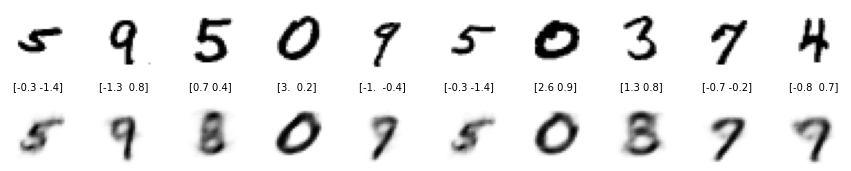

In [15]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

_,_,z_points = model.encoder.predict(example_images)

reconst_images = model.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)   
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')


In [19]:
x = tf.constant([
    [[1, 1, 1],
     [1, 1, 1]],
    [[2, 2, 2],
     [2, 2, 2]],
])

In [20]:
tf.reduce_sum(x, axis=(1,2)).numpy()

array([ 6, 12], dtype=int32)